In [67]:
# imports for ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics


In [68]:
# import data
data = pd.read_csv("data.csv",header=0)

In [69]:
print(data) 

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [71]:
data.drop("Unnamed: 32",axis=1,inplace=True) 

In [72]:
data.drop("id",axis=1,inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [74]:
# dividing features according to their category
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [75]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0}) # changing diagnosis into binary

In [76]:
data.describe() #basic statistics

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/root/anaconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

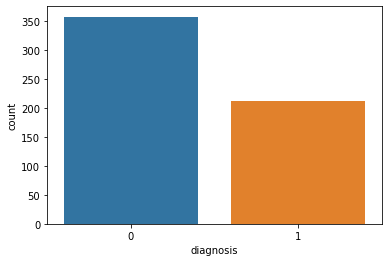

In [77]:
sns.countplot(data['diagnosis'],label="Count") # frequency of M and B diagnosis

<AxesSubplot:>

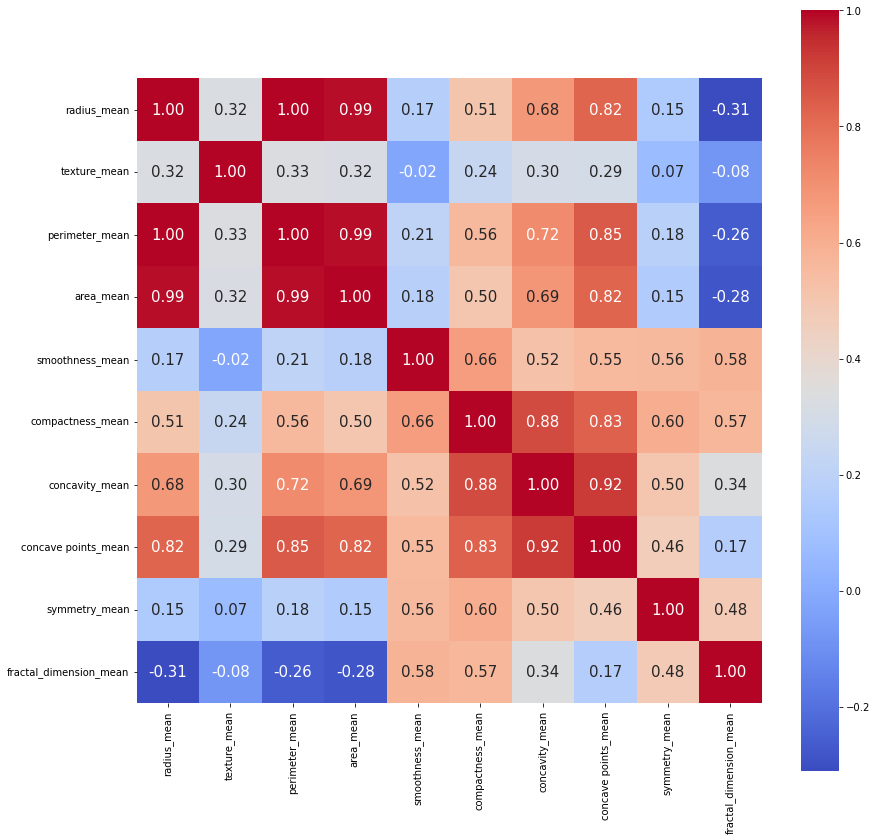

In [78]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

<AxesSubplot:>

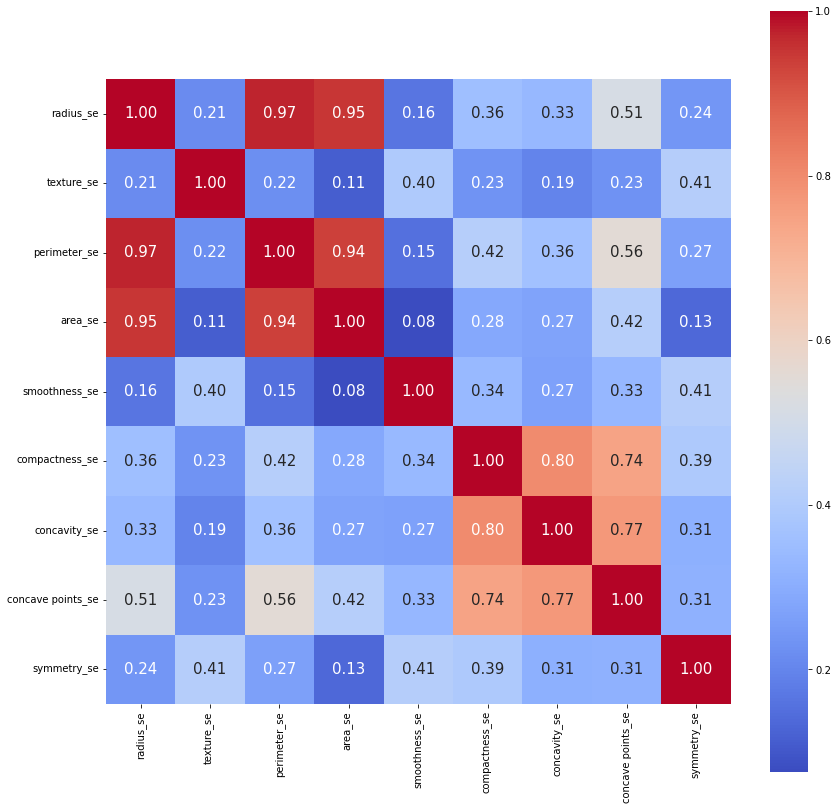

In [79]:
corr2 = data[features_se].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_se, yticklabels= features_se,
           cmap= 'coolwarm')

<AxesSubplot:>

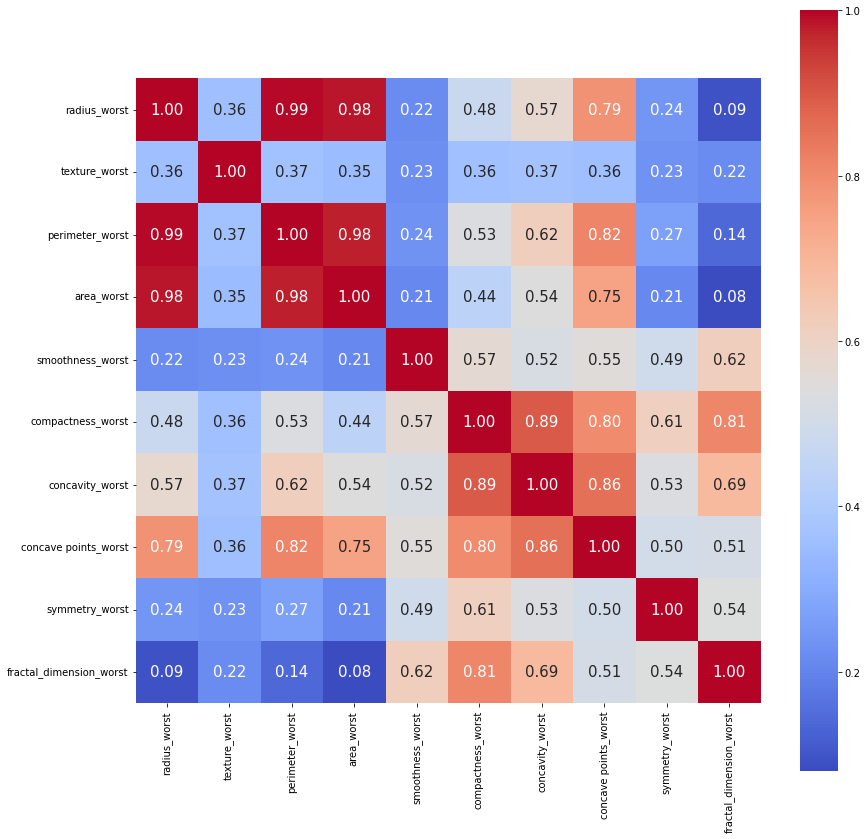

In [80]:
corr3 = data[features_worst].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr3, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_worst, yticklabels= features_worst,
           cmap= 'coolwarm')

In [98]:
# variables to use in prediction
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

AttributeError: 'list' object has no attribute 'head'

In [82]:
#split data into train and test sets
train, test = train_test_split(data, test_size = 0.3)
# check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [83]:
train_X = train[prediction_var] # training data input
train_y = train.diagnosis       # training data output
test_X = test[prediction_var]   # training data input
test_y = test.diagnosis         # training data output

In [84]:
model=RandomForestClassifier(n_estimators=100) # simple random forest

In [85]:
model.fit(train_X,train_y) #fit model to training data

RandomForestClassifier()

In [86]:
prediction=model.predict(test_X) # prediction for test data

In [87]:
metrics.accuracy_score(prediction,test_y) # accuracy of prediction

0.9005847953216374

In [88]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

perimeter_mean      0.537303
compactness_mean    0.202887
texture_mean        0.109101
smoothness_mean     0.096460
symmetry_mean       0.054249
dtype: float64


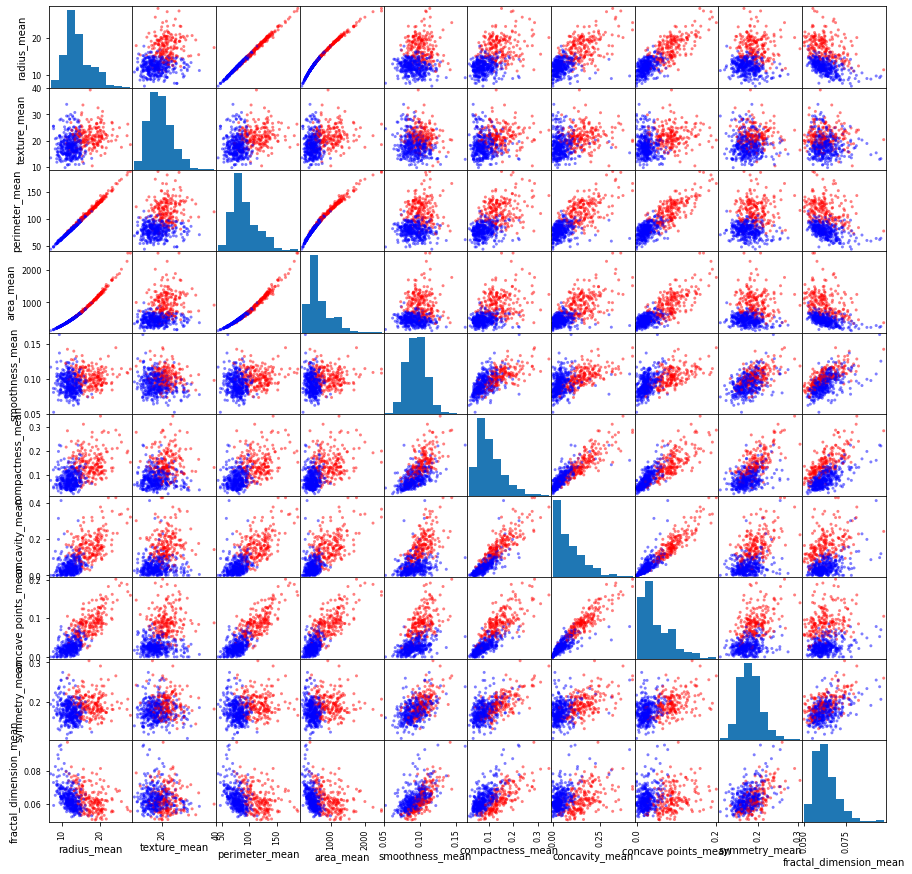

In [89]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

In [90]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [91]:
def model(model,data,prediction,outcome):
    # This function will be used for to check accuracy of different model
    # model is the m
    kf = KFold(data.shape[0], n_folds=10) # if you have refer the link then you must understand what is n_folds

In [92]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [93]:
from sklearn.model_selection import KFold

In [94]:
# As we are going to use many models lets make a function
# Which we can use with different models
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(n_splits=5)
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [95]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%


TypeError: 'KFold' object is not iterable

In [ ]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(train_X, train_y)



In [97]:
print('Score list:', select_feature.scores_)
print('Feature list:', train_X.columns)



Score list: [5.57482840e+01 1.43525694e+03 1.27805821e-01 4.28924526e+00
 2.13793160e-01]
Feature list: Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean'],
      dtype='object')
